In [1]:
import warnings
warnings.simplefilter("ignore")
import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df=pd.read_csv("Malignant_train_data.csv")
print(df)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  

In [3]:
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [4]:
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<AxesSubplot:>

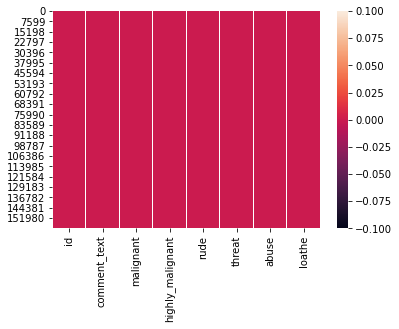

In [7]:
sn.heatmap(df.isnull())

# EDA

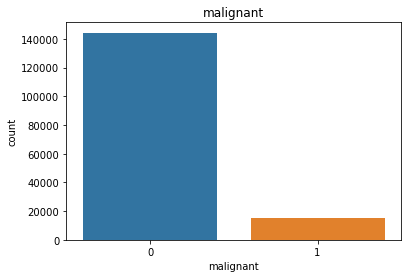

In [8]:
sn.countplot(df["malignant"])
plt.title("malignant")
plt.show()

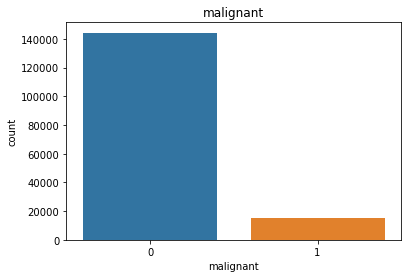

In [9]:
sn.countplot(df["malignant"])
plt.title("malignant")
plt.show()

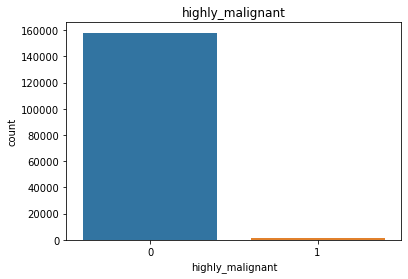

In [10]:
sn.countplot(df["highly_malignant"])
plt.title("highly_malignant")
plt.show()

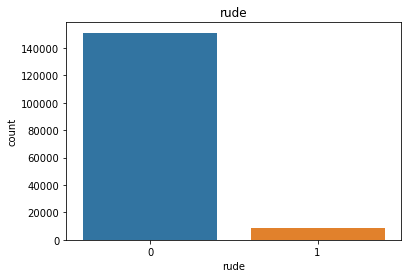

In [11]:
sn.countplot(df["rude"])
plt.title("rude")
plt.show()

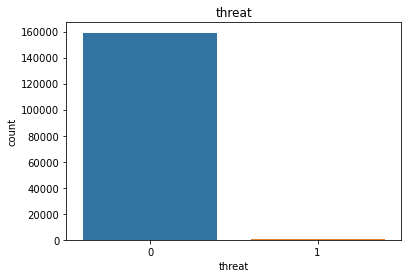

In [12]:
sn.countplot(df["threat"])
plt.title("threat")
plt.show()

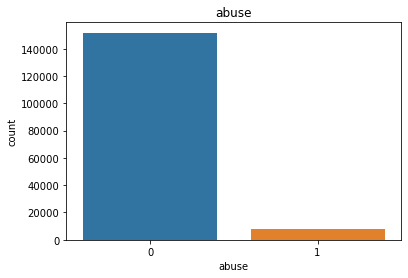

In [13]:
sn.countplot(df["abuse"])
plt.title("abuse")
plt.show()

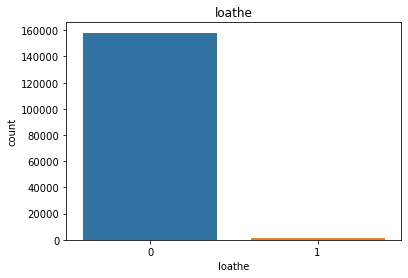

In [14]:
sn.countplot(df["loathe"])
plt.title("loathe")
plt.show()

<AxesSubplot:>

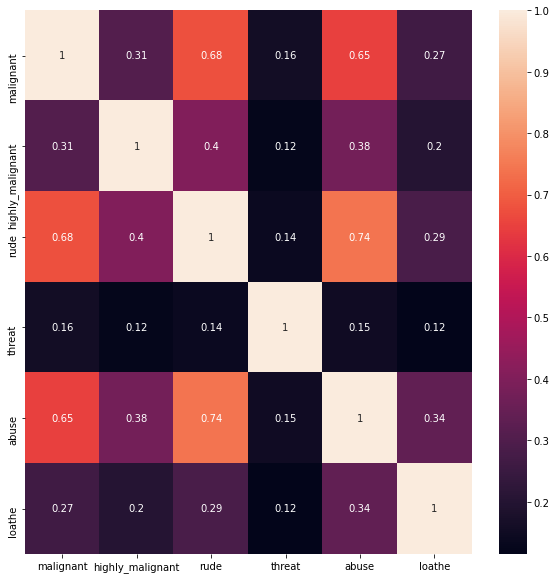

In [15]:
plt.figure(figsize=(10,10))
corr=df.corr() 
sn.heatmap(corr, annot=True)

In [16]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['id', 'comment_text'], dtype='object')


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   id                159571 non-null  int32
 1   comment_text      159571 non-null  int32
 2   malignant         159571 non-null  int64
 3   highly_malignant  159571 non-null  int64
 4   rude              159571 non-null  int64
 5   threat            159571 non-null  int64
 6   abuse             159571 non-null  int64
 7   loathe            159571 non-null  int64
dtypes: int32(2), int64(6)
memory usage: 8.5 MB
None


In [18]:
df.skew()

id                  7.386055e-17
comment_text        1.282301e-19
malignant           2.745854e+00
highly_malignant    9.851722e+00
rude                3.992817e+00
threat              1.818900e+01
abuse               4.160540e+00
loathe              1.051592e+01
dtype: float64

In [19]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[1.73203995, 0.15385056, 0.3255832 , ..., 0.05481361, 0.22787476,
        0.09425005],
       [1.73201824, 0.24804523, 0.3255832 , ..., 0.05481361, 0.22787476,
        0.09425005],
       [1.73199654, 0.00414639, 0.3255832 , ..., 0.05481361, 0.22787476,
        0.09425005],
       ...,
       [1.73104135, 0.92084566, 0.3255832 , ..., 0.05481361, 0.22787476,
        0.09425005],
       [1.73128014, 0.42870621, 0.3255832 , ..., 0.05481361, 0.22787476,
        0.09425005],
       [1.7314104 , 1.05676472, 0.3255832 , ..., 0.05481361, 0.22787476,
        0.09425005]])

In [20]:
threshold=3
print(np.where(z>3))

(array([     6,      6,      6, ..., 159554, 159554, 159554], dtype=int64), array([2, 3, 4, ..., 2, 4, 6], dtype=int64))


In [25]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [26]:
x=df[['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']]

In [27]:
y=df['highly_malignant']

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [29]:
Scaledx=sc.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [31]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(Scaledx,y,test_size=25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        print(f" Best accuracy {accu*100} found on random_state {best_rstate} ")

 Best accuracy 100.0 found on random_state 31 


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Scaledx,y,test_size=25,random_state=62)

In [33]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100},cross_val_score={cvscore*100} & difference ={(r2score*100)-(cvscore*100)}")

Accuracy=0.0,cross_val_score=100.0 & difference =-100.0


In [34]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100},cross_val_score={cvscore*100} & difference ={(r2score*100)-(cvscore*100)}")

Accuracy=100.0,cross_val_score=100.0 & difference =0.0


In [35]:
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
y_pred=ADB.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100},cross_val_score={cvscore*100} & difference ={(r2score*100)-(cvscore*100)}")

Accuracy=100.0,cross_val_score=100.0 & difference =0.0


In [36]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy={r2score*100},cross_val_score={cvscore*100} & difference ={(r2score*100)-(cvscore*100)}")

Accuracy=0.0,cross_val_score=99.99999872788769 & difference =-99.99999872788769
